## Sigmoid and Tanh
While a sigmoid activation function is meant to mimic a neuron activation level, a deeply negative input causes the sigmoid value to become very close to 0. This is typically a problem for many gradient based training algortihms due to small gradients. This can be somewhat alleviated by switching over to a hyperbolic tangent activation which mapes the real line onto -1 to 1 and is still monotonically increasing.

It is related to the sigmoid/logistic function by the following: $$\frac{e^z - e^{-z}}{e^z + e^{-z}} = \sigma_{\mathrm{tanh}}(z) = 2\times \sigma_{\mathrm{logistic}}(2z) - 1$$

This can also be accessed with torch, using torch.tanh and torch.sigmoid, which are used on torch tensors.

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

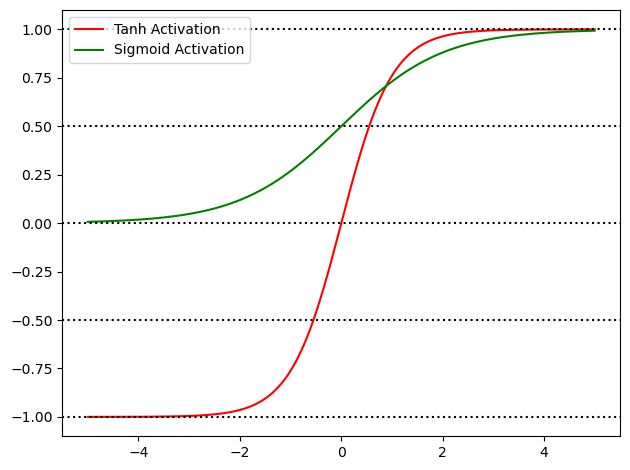

In [2]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

def tanh(z):
    ep, em = np.exp(z), np.exp(-z)
    return (ep - em) / (ep + em)

z = np.arange(-5, 5, 0.005)

plt.plot(z, tanh(z), label='Tanh Activation', color='red')
plt.plot(z, sigmoid(z), label='Sigmoid Activation', color='green')

plt.axhline(0, color='black', linestyle=':')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')

plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [6]:
print(f"tanh(20) = {tanh(20)}, tanh(30) = {tanh(30)}")
print(f"sigmoid(20) = {sigmoid(20)}, sigmoid(30) = {sigmoid(30)}")

tanh(20) = 1.0, tanh(30) = 1.0
sigmoid(20) = 0.9999999979388463, sigmoid(30) = 0.9999999999999065


## ReLU

The rectified linear unit is fairly common with deep NNs. Both the tanh and sigmoid have trouble differentiating between large positive or large negative inputs - their derivative gets smaller with the absolute value of the input. The rectified linear unit introduces a non-linearity , solving this problem in part: $\sigma_{\mathrm{ReLU}}(z) = z \Theta(z) = \mathrm{max}(0, z),$ where $\Theta$ is the Heaviside step function with $\Theta(0) = 0$. For positive values, the derivative of this acctivation is $1$, which resolves the problem of vanishing gradients.

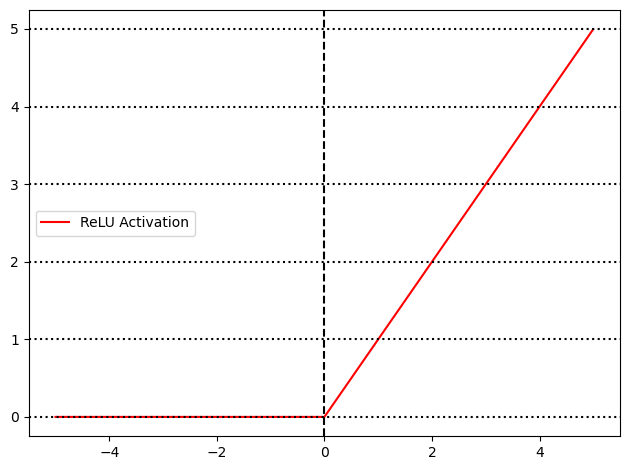

In [14]:
def ReLU(z):
    return np.heaviside(z, 0) * z

# Or
# torch.relu(torch.from_numpy(z))

plt.plot(z, ReLU(z), label='ReLU Activation', color='red')

plt.axhline(0, color='black', linestyle=':')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(3, color='black', linestyle=':')
plt.axhline(4, color='black', linestyle=':')
plt.axhline(2, color='black', linestyle=':')
plt.axhline(5, color='black', linestyle=':')

plt.axvline(0, color='black', linestyle='--')

plt.tight_layout()
plt.legend(loc='best')
plt.show()


## Other Activations

### Linear
The linear activation function is simply the identity function on the space of inputs. This needs to be chained with other inputs for a true neural network, or it will be a linear regression since the composition and sum of linear transformations is linear and could ultimately be reparametrized as $y = Ax + B$. This can be used for Adaline based learning steps.

### Heaviside Activation
The Heaviside activation function (where the unit step variant is typically used) is simply the linear function for positive values, $0.5$ for $z = 0$, and vanishing for $z<0$. This is simply a variant of the perceptron activation.

### Signum (Sign)
The sign activation is simply the limit of the hyperbolic tangent function, with an output of +1 for positive values, -1 for negative values and 0 otherwise. This is also a variant of the perceptron activation.

### Piecewise Linear
A great alternative to the linear activation is the piecewise linear activation function. As the name suggests, this is piecewise linear. a common example is: $$\sigma(z) = \begin{cases}
0 & \text{if } z < -\frac{1}{2} \\
z + \frac{1}{2} & \text{if } -\frac{1}{2} \leq z \leq \frac{1}{2} \\
1 & \text{if } z > \frac{1}{2}
\end{cases}.$$ This is often used in the context of an SVM.

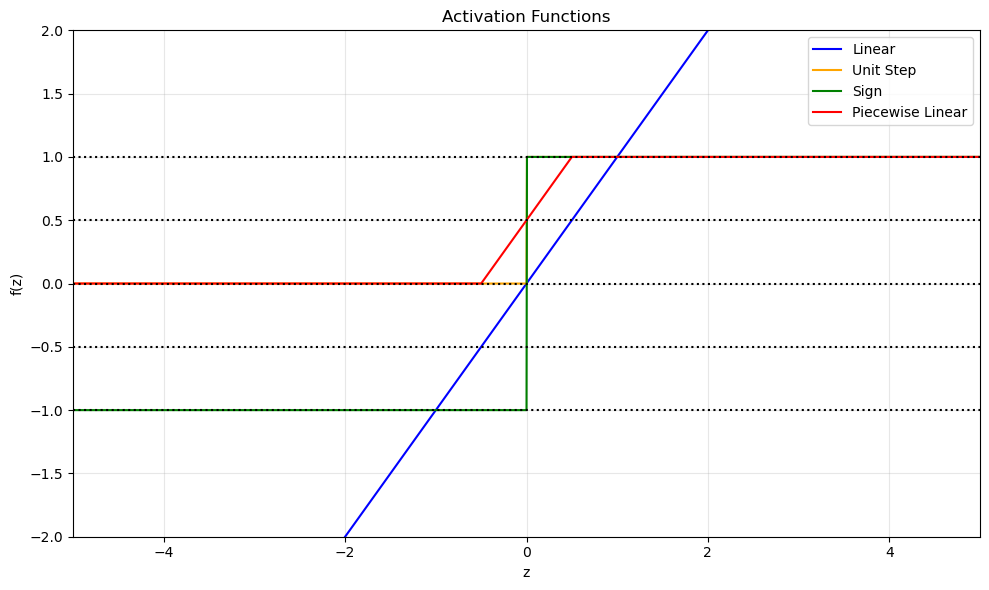

In [17]:
def linear(z):
    return z

def unitstep(z):
    return np.where(z >= 0, 1, 0)

def sign(z):
    return np.where(z > 0, 1, np.where(z < 0, -1, 0))

def piecewise_linear(z):
    return np.where(z < -0.5, 0, np.where(z <= 0.5, z + 0.5, 1))

z = np.arange(-5, 5, 0.005)

plt.figure(figsize=(10, 6))

plt.plot(z, linear(z), label='Linear', color='blue')
plt.plot(z, unitstep(z), label='Unit Step', color='orange')
plt.plot(z, sign(z), label='Sign', color='green')
plt.plot(z, piecewise_linear(z), label='Piecewise Linear', color='red')
# plt.plot(z, tanh(z), label='Tanh Activation', color='red')
# plt.plot(z, sigmoid(z), label='Sigmoid Activation', color='green')

plt.axhline(0, color='black', linestyle=':')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')

plt.xlim(-5, 5)
plt.ylim(-2, 2)
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Activation Functions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(loc='best')
plt.show()